<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool
4. Dropout              - Regularization Technique  
5. Batch Normalization 
6. Image augmentation of random rotation between -5 to +5 degrees7

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 
3. StepLR with step size 7 and gamma value 0.1. 

Target: 
======

In this step

1. Reduced the number of parameters but the channel size in different conv layers are different, especially keeping the 4 layer structure in mind 
3. Target is to achieve over 99.4% validation accuracy with less than 6,000 parameters
4. Run it for less than 15 epochs to study how the accuracy changes with Image Augmentation technique

Result: 
======
1. Observed Train accuracy: 98.88%
2. Validation accuracy:99.4%
3. Number of parameters: 5,854


Analysis: 
========

1. The model finally achieved 99.4% accuracy and seems to be pretty stable 
2. EVen though I achieved 99.4% with less than 6k parameters, According to me the best model is step 11 where it is more consistent 
3. I will try more to see if i can bring the parameters down some more by keeping the target of 99.4%


In [2]:
from model import model11 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.069
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
       BatchNorm2d-3           [-1, 10, 28, 28]              20
         Dropout2d-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 10, 28, 28]             900
              ReLU-6           [-1, 10, 28, 28]               0
       BatchNorm2d-7           [-1, 10, 28, 28]              20
         Dropout2d-8           [-1, 10, 28, 28]               0
         MaxPool2d-9           [-1, 10, 14, 14]               0
           Conv2d-10           [-1, 12, 14, 14]           1,080
             ReLU-11           [-1, 12, 14, 14]               0
      BatchNorm2d-12           [-1, 12, 14, 14]              24
        Dropout2d-13           [-1, 12, 14, 14]               0
           Conv2d-14           [-1, 12,

G:\TSAI-ERA\Session 7\model.py:661: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader_rotation, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 64
rotation_range = (-5.0, 5.0)
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader_rotation(batch_size, rotation_range, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [6]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.069).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.019, momentum=0.9)
scheduler = StepLR(optimizer, step_size=7, gamma=0.1)
for epoch in range(1, 15):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    scheduler.step()

Currently Executing Epoch: 1


Loss=0.2256779968738556 Batch_id=937 Accuracy=93.27: 100%|███████████████████████████| 938/938 [01:02<00:00, 15.07it/s]



Test set: Average loss: 0.0459, Accuracy: 9844/10000 (98.44%)

Currently Executing Epoch: 2


Loss=0.13864199817180634 Batch_id=937 Accuracy=97.39: 100%|██████████████████████████| 938/938 [01:10<00:00, 13.28it/s]



Test set: Average loss: 0.0380, Accuracy: 9868/10000 (98.68%)

Currently Executing Epoch: 3


Loss=0.08471768349409103 Batch_id=937 Accuracy=97.90: 100%|██████████████████████████| 938/938 [01:08<00:00, 13.77it/s]



Test set: Average loss: 0.0307, Accuracy: 9896/10000 (98.96%)

Currently Executing Epoch: 4


Loss=0.024209586903452873 Batch_id=937 Accuracy=98.10: 100%|█████████████████████████| 938/938 [01:06<00:00, 14.14it/s]



Test set: Average loss: 0.0270, Accuracy: 9909/10000 (99.09%)

Currently Executing Epoch: 5


Loss=0.02218925952911377 Batch_id=937 Accuracy=98.23: 100%|██████████████████████████| 938/938 [01:06<00:00, 14.06it/s]



Test set: Average loss: 0.0264, Accuracy: 9909/10000 (99.09%)

Currently Executing Epoch: 6


Loss=0.15008820593357086 Batch_id=937 Accuracy=98.39: 100%|██████████████████████████| 938/938 [01:07<00:00, 13.87it/s]



Test set: Average loss: 0.0234, Accuracy: 9925/10000 (99.25%)

Currently Executing Epoch: 7


Loss=0.009255574084818363 Batch_id=937 Accuracy=98.37: 100%|█████████████████████████| 938/938 [01:07<00:00, 13.92it/s]



Test set: Average loss: 0.0237, Accuracy: 9926/10000 (99.26%)

Currently Executing Epoch: 8


Loss=0.20908334851264954 Batch_id=937 Accuracy=98.68: 100%|██████████████████████████| 938/938 [01:06<00:00, 14.03it/s]



Test set: Average loss: 0.0204, Accuracy: 9933/10000 (99.33%)

Currently Executing Epoch: 9


Loss=0.10751736164093018 Batch_id=937 Accuracy=98.70: 100%|██████████████████████████| 938/938 [01:07<00:00, 13.99it/s]



Test set: Average loss: 0.0191, Accuracy: 9936/10000 (99.36%)

Currently Executing Epoch: 10


Loss=0.009027262218296528 Batch_id=937 Accuracy=98.83: 100%|█████████████████████████| 938/938 [01:06<00:00, 14.01it/s]



Test set: Average loss: 0.0190, Accuracy: 9935/10000 (99.35%)

Currently Executing Epoch: 11


Loss=0.03784281387925148 Batch_id=937 Accuracy=98.84: 100%|██████████████████████████| 938/938 [01:07<00:00, 13.87it/s]



Test set: Average loss: 0.0191, Accuracy: 9939/10000 (99.39%)

Currently Executing Epoch: 12


Loss=0.020202331244945526 Batch_id=937 Accuracy=98.78: 100%|█████████████████████████| 938/938 [01:07<00:00, 13.88it/s]



Test set: Average loss: 0.0188, Accuracy: 9940/10000 (99.40%)

Currently Executing Epoch: 13


Loss=0.00550871342420578 Batch_id=937 Accuracy=98.88: 100%|██████████████████████████| 938/938 [01:27<00:00, 10.74it/s]



Test set: Average loss: 0.0189, Accuracy: 9937/10000 (99.37%)

Currently Executing Epoch: 14


Loss=0.01900807023048401 Batch_id=937 Accuracy=98.86: 100%|██████████████████████████| 938/938 [01:14<00:00, 12.53it/s]



Test set: Average loss: 0.0189, Accuracy: 9935/10000 (99.35%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

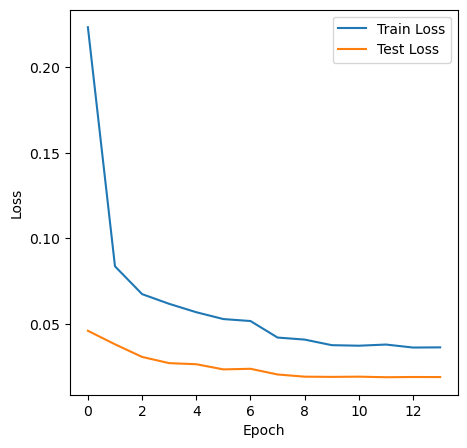

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

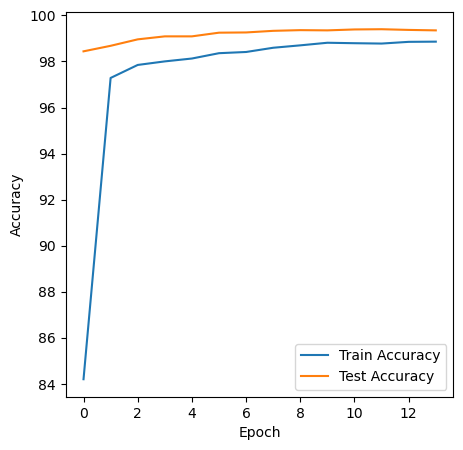

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
